In [37]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

# Data Loading

In [38]:
data2009 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata/Data2009.csv')
data2010 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata/Data2010.csv')
data2011 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata/Data2011.csv')
data2012 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata/Data2012.csv')
data2013 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata/Data2013.csv')
data2014 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata/Data2014.csv')

In [39]:
frames = [data2009, data2010, data2011, data2012, data2013]
model_data = pd.concat(frames, axis=0, join='outer',copy=True)

In [40]:
def drop(df):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()

In [41]:
drop(model_data)
drop(data2014)

In [42]:
model_data = model_data[np.isfinite(model_data['Crime_rate'])]
data2014 = data2014[np.isfinite(data2014['Crime_rate'])]

# Data Correlation

In [43]:
model_data.corr()['Crime_rate'].sort_values()

Age                            -0.275623
YEAR                           -0.037061
Chronic respiratory diseases    0.122393
Nutritional deficiencies        0.136693
Cardiovascular diseases         0.176481
Unemployment_rate               0.243807
HIV/AIDS and tuberculosis       0.432302
Crime_rate                      1.000000
Name: Crime_rate, dtype: float64

In [44]:
categories = ['Cardiovascular diseases',
       'Chronic respiratory diseases', 'HIV/AIDS and tuberculosis',
       'Nutritional deficiencies', 'Age', 'Unemployment_rate']
X_train = model_data[categories]
y_train = model_data[['Crime_rate']]
X_test = data2014[categories]
y_test = data2014[['Crime_rate']]
#X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.1, random_state=101)

# OLS Linear Regession/Linear Regression

In [33]:
import statsmodels.api as sm

In [53]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Crime_rate   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     8825.
Date:                Sun, 09 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:11:43   Log-Likelihood:            -1.3532e+05
No. Observations:               14587   AIC:                         2.707e+05
Df Residuals:                   14581   BIC:                         2.707e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Cardiovascular diseases         -2.9548      0.508     -5.819      0.000      -3.950      -1.959
Chronic respiratory diseases    25.5818      1.761     14.527      0.000      22.130      29.034
HIV/AIDS and tuberculosis      699.5640     14.019     49.901      0.000     672.085     727.043
Nutritional deficiencies        24.0570     36.209      0.664      0.506     -46.917      95.031
Age                             25.6993      1.305     19.686      0.000      23.140      28.258
Unemployment_rate               90.2310      7.839     11.511      0.000      74.866     105.596
==============================================================================
Omnibus:                    15364.852   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7525973.620
Skew:                           4.573   Prob(JB):                         0.00
Kurtosis:                     113.900   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn import metrics

In [49]:
gbm = GradientBoostingRegressor(n_estimators=100)
gbm.fit(X_train, y_train)
predictions = gbm.predict(X_test)

/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
print gbm.feature_importances_
print "R-squared for Train: %.2f" %gbm.score(X_train, y_train) 
print "R-squared for Test: %.2f" %gbm.score(X_test, y_test) 

[0.05426337 0.12520239 0.60349546 0.04770605 0.1285621  0.04077063]
R-squared for Train: 0.41
R-squared for Test: 0.33


In [51]:
def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor() 
    cv = ShuffleSplit(X_train.shape[0], test_size=0.2)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) 
    classifier.fit(X_train, y_train)
    print "Best Estimator learned through GridSearch" 
    print classifier.best_estimator_ 
    return cv, classifier.best_estimator_

In [52]:
param_grid={'n_estimators':[100], 
            'learning_rate': [0.1],
            'max_depth':[6], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 
n_jobs=4 

In [266]:
cv,best_est=GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [267]:
print "Best Estimator Parameters" 
print"---------------------------" 
print "n_estimators: %d" %best_est.n_estimators 
print "max_depth: %d" %best_est.max_depth 
print "Learning Rate: %.1f" %best_est.learning_rate 
print "min_samples_leaf: %d" %best_est.min_samples_leaf 
print "max_features: %.1f" %best_est.max_features 
print
print "Train R-squared: %.2f" %best_est.score(X_train,y_train) 

Best Estimator Parameters
---------------------------
n_estimators: 100
max_depth: 6
Learning Rate: 0.1
min_samples_leaf: 3
max_features: 1.0

Train R-squared: 0.62


In [268]:
estimator = best_est 
#Re-fitting to the train set 
estimator.fit(X_train, y_train) 
#Calculating train/test scores - R-squared value 
print "Train R-squared: %.2f" %estimator.score(X_train, y_train) 
print "Test R-squared: %.2f" %estimator.score(X_test, y_test) 

Train R-squared: 0.62
Test R-squared: 0.48


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest(estimators):
    regressor = RandomForestRegressor(n_estimators=estimators, random_state=0)  
    regressor.fit(X_train, y_train)  
    y_pred = regressor.predict(X_test)
    print('Number of Trees: %.2f' %estimators)
    print('Mean Absolute Error: %.2f' %metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error: %.2f' %metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error: %.2f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
    print

In [42]:
num_trees = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300]
for tree in num_trees:
    RandomForest(tree)

/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Number of Trees: 10.00
Mean Absolute Error: 1322.66
Mean Squared Error: 3802069.78
Root Mean Squared Error: 1949.89

Number of Trees: 20.00
Mean Absolute Error: 1283.22
Mean Squared Error: 3499675.79
Root Mean Squared Error: 1870.74

Number of Trees: 40.00
Mean Absolute Error: 1264.87
Mean Squared Error: 3389512.11
Root Mean Squared Error: 1841.06

Number of Trees: 60.00
Mean Absolute Error: 1259.12
Mean Squared Error: 3396125.23
Root Mean Squared Error: 1842.86

Number of Trees: 80.00
Mean Absolute Error: 1253.94
Mean Squared Error: 3346763.19
Root Mean Squared Error: 1829.42

Number of Trees: 100.00
Mean Absolute Error: 1248.84
Mean Squared Error: 3325610.45
Root Mean Squared Error: 1823.63

Number of Trees: 120.00
Mean Absolute Error: 1248.19
Mean Squared Error: 3334035.42
Root Mean Squared Error: 1825.93

Number of Trees: 140.00
Mean Absolute Error: 1243.96
Mean Squared Error: 3308052.00
Root Mean Squared Error: 1818.81

Number of Trees: 160.00
Mean Absolute Error: 1244.29
Mean Squ

# Neural Network

In [12]:
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [48]:
model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
14587/14587 [==============================] - 3s 197us/step - loss: 1977.4014 - mean_absolute_error: 1977.4014
Epoch 2/100
14587/14587 [==============================] - 3s 172us/step - loss: 1824.1576 - mean_absolute_error: 1824.1576
Epoch 3/100
14587/14587 [==============================] - 3s 178us/step - loss: 1802.4190 - mean_absolute_error: 1802.4190
Epoch 4/100
14587/14587 [==============================] - 3s 174us/step - loss: 1787.5347 - mean_absolute_error: 1787.5347
Epoch 5/100
14587/14587 [==============================] - 3s 175us/step - loss: 1774.6305 - mean_absolute_error: 1774.6305
Epoch 6/100
14587/14587 [==============================] - 3s 177us/step - loss: 1758.9056 - mean_absolute_error: 1758.9056
Epoch 7/100
14587/14587 [==============================] - 3s 180us/step - loss: 1742.1564 - mean_absolute_error: 1742.1564
Epoch 8/100
14587/14587 [==============================] - 2s 171us/step - loss: 1740.8345 - mean_absolute_error: 1740.8345
Epoch 9/

In [49]:
y_pred = model.predict(X_test)

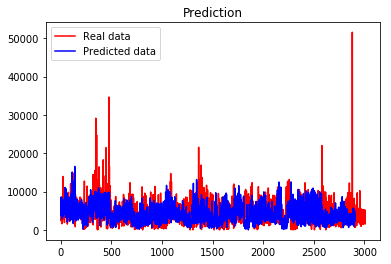

In [50]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

# Scaling the data

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

# Gradient Boosting With scaled data

In [52]:
gbm = GradientBoostingRegressor(n_estimators=100)
gbm.fit(X_train, y_train)
predictions = gbm.predict(X_test)

In [53]:
print gbm.feature_importances_
print "R-squared for Train: %.2f" %gbm.score(X_train, y_train) 
print "R-squared for Test: %.2f" %gbm.score(X_test, y_test) 

[0.05463298 0.1259155  0.60375797 0.04741059 0.12786941 0.04041356]
R-squared for Train: 0.41
R-squared for Test: 0.33


In [54]:
cv,best_est=GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [55]:
print "Best Estimator Parameters" 
print"---------------------------" 
print "n_estimators: %d" %best_est.n_estimators 
print "max_depth: %d" %best_est.max_depth 
print "Learning Rate: %.1f" %best_est.learning_rate 
print "min_samples_leaf: %d" %best_est.min_samples_leaf 
print "max_features: %.1f" %best_est.max_features 
print
print "Train R-squared: %.2f" %best_est.score(X_train,y_train) 

Best Estimator Parameters
---------------------------
n_estimators: 100
max_depth: 6
Learning Rate: 0.1
min_samples_leaf: 3
max_features: 1.0

Train R-squared: 0.62


In [56]:
estimator = best_est 
#Re-fitting to the train set 
estimator.fit(X_train, y_train) 
#Calculating train/test scores - R-squared value 
print "Train R-squared: %.2f" %estimator.score(X_train, y_train) 
print "Test R-squared: %.2f" %estimator.score(X_test, y_test) 

Train R-squared: 0.62
Test R-squared: 0.48


# Random Forest With Scaled data

In [57]:
num_trees = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300]
for tree in num_trees:
    RandomForest(tree)

/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Number of Trees: 10.00
Mean Absolute Error: 1322.48
Mean Squared Error: 3801153.99
Root Mean Squared Error: 1949.65

Number of Trees: 20.00
Mean Absolute Error: 1283.15
Mean Squared Error: 3500883.33
Root Mean Squared Error: 1871.06

Number of Trees: 40.00
Mean Absolute Error: 1265.97
Mean Squared Error: 3393601.11
Root Mean Squared Error: 1842.17

Number of Trees: 60.00
Mean Absolute Error: 1259.73
Mean Squared Error: 3398569.02
Root Mean Squared Error: 1843.52

Number of Trees: 80.00
Mean Absolute Error: 1254.50
Mean Squared Error: 3347569.92
Root Mean Squared Error: 1829.64

Number of Trees: 100.00
Mean Absolute Error: 1249.09
Mean Squared Error: 3326095.94
Root Mean Squared Error: 1823.76

Number of Trees: 120.00
Mean Absolute Error: 1248.55
Mean Squared Error: 3334657.43
Root Mean Squared Error: 1826.10

Number of Trees: 140.00
Mean Absolute Error: 1244.06
Mean Squared Error: 3306309.74
Root Mean Squared Error: 1818.33

Number of Trees: 160.00
Mean Absolute Error: 1244.44
Mean Squ

# Neural Network with Scaled Data

In [58]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
14587/14587 [==============================] - 3s 196us/step - loss: 1223.5925 - mean_absolute_error: 1223.5925
Epoch 2/100
14587/14587 [==============================] - 3s 173us/step - loss: 1213.6635 - mean_absolute_error: 1213.6635
Epoch 3/100
14587/14587 [==============================] - 3s 173us/step - loss: 1211.6069 - mean_absolute_error: 1211.6069
Epoch 4/100
14587/14587 [==============================] - 3s 175us/step - loss: 1201.3830 - mean_absolute_error: 1201.3830 2s -
Epoch 5/100
14587/14587 [==============================] - 3s 174us/step - loss: 1193.7958 - mean_absolute_error: 1193.7958
Epoch 6/100
14587/14587 [==============================] - 3s 174us/step - loss: 1186.5893 - mean_absolute_error: 1186.5893
Epoch 7/100
14587/14587 [==============================] - 3s 176us/step - loss: 1185.6584 - mean_absolute_error: 1185.6584
Epoch 8/100
14587/14587 [==============================] - 3s 175us/step - loss: 1182.2203 - mean_absolute_error: 1182.2203
Epo

In [59]:
y_pred = model.predict(X_test)

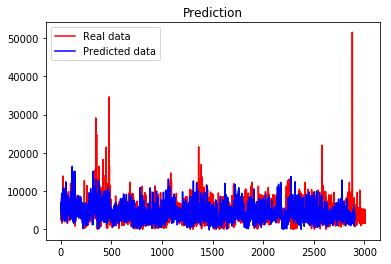

In [60]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()